In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

del mnist
del x_train
del y_train

model = tf.keras.models.Sequential([
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(512, activation=tf.nn.relu),
          tf.keras.layers.Dropout(0.2),
          tf.keras.layers.Dense(10, activation=tf.nn.softmax)
        ])

model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [3]:
def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, l.shape[0], n):
        yield l[i:i + n]

In [4]:
batch_cost = []
for x, y in zip(chunks(x_test, 32),chunks(y_test, 32)):
    model.train_on_batch(x,y)
    batch_cost.append(model.evaluate(x_test, y_test, verbose=1 )[1])

10000/10000 [==============================] - 0s 35us/step


10000/10000 [==============================] - 0s 35us/step


10000/10000 [==============================] - 0s 35us/step


<IPython.core.display.Javascript object>


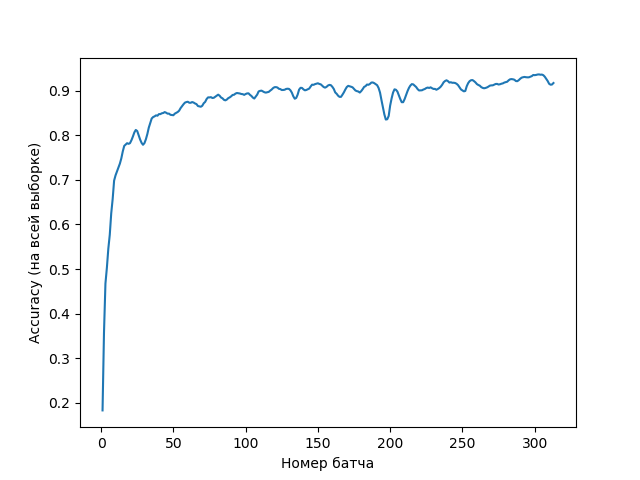

Text(0, 0.5, 'Accuracy (на всей выборке)')

In [12]:
plt.plot(np.arange(1,len(batch_cost)+1), batch_cost)
plt.xlabel('Номер батча')
plt.ylabel('Accuracy (на всей выборке)')